In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import string

In [3]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Unnamed: 0,Total-Score,corpus,Normalised,Relevance
0,1,9.0,Papaya Homes Revolutionizes Precision-Engineer...,0.06,Low
1,2,95.1,Sustainability as a Driver of Success: Lessons...,0.62,Medium
2,3,2.6,Hurricane Kristy tracker: Category 4 storm exp...,0.02,Low
3,4,0.7,LeBron and Bronny playing together with Lakers...,0.00,Low
4,5,6.3,Most teachers don't recommend teaching. 3 ways...,0.04,Low


In [11]:
stop = set(stopwords.words('english'))
punctuations = string.punctuation

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuations])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

df['clean_paragraph'] = df['corpus'].apply(preprocess)

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X = vectorizer.fit_transform(df['clean_paragraph']).toarray()
y = df['Relevance']  # Ensure that labels are numerical or encoded

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [83]:
y_pred = model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
cr1 = classification_report(y_test, y_pred,output_dict=True)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8914798206278027

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.89      0.98      0.93       852
           2       0.88      0.62      0.73       260

    accuracy                           0.89      1115
   macro avg       0.59      0.53      0.55      1115
weighted avg       0.89      0.89      0.88      1115


Confusion Matrix:
 [[  0   0   3]
 [  0 832  20]
 [  0  98 162]]


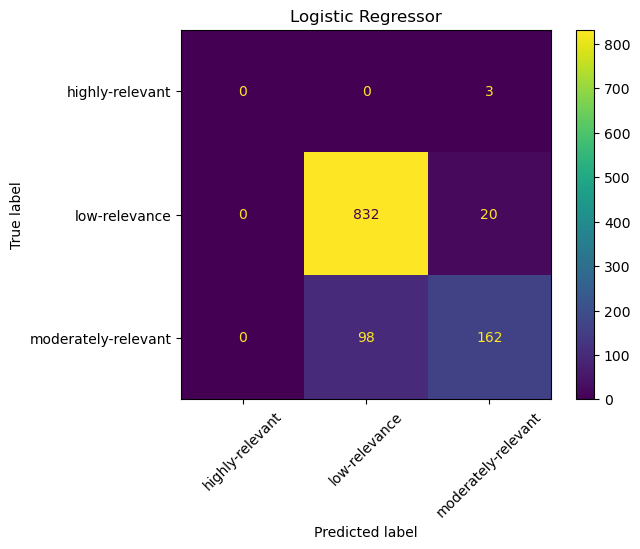

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = ['highly-relevant', 'low-relevance','moderately-relevant'])
cm_display.plot()
plt.xticks(rotation = 45)
plt.title("Logistic Regressor")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
y_pred2 = rfc.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy_score(y_test, y_pred2))
cr2 = classification_report(y_test, y_pred2,output_dict=True)
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
cm2 = confusion_matrix(y_test, y_pred2)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.8609865470852018

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.85      1.00      0.92       852
           2       0.94      0.43      0.59       260

    accuracy                           0.86      1115
   macro avg       0.60      0.48      0.50      1115
weighted avg       0.87      0.86      0.84      1115


Confusion Matrix:
 [[  0   0   3]
 [  0 848   4]
 [  0 148 112]]


In [41]:
import warnings
warnings.filterwarnings('ignore')

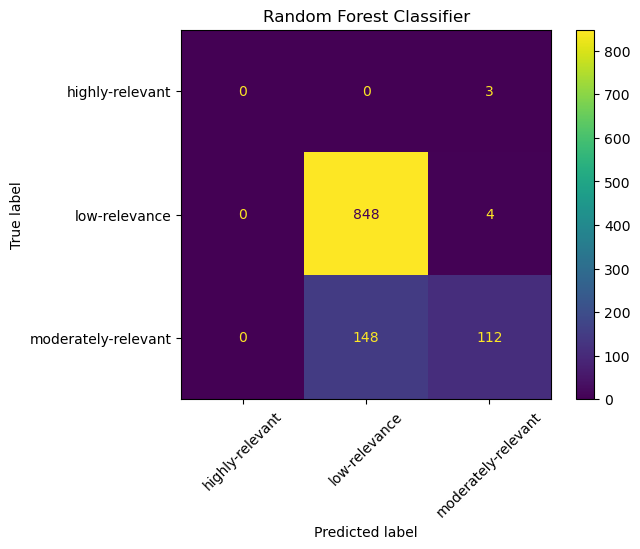

In [133]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred2), display_labels = ['highly-relevant', 'low-relevance','moderately-relevant'])
cm_display.plot()
plt.title("Random Forest Classifier")
plt.xticks(rotation = 45)
plt.show()

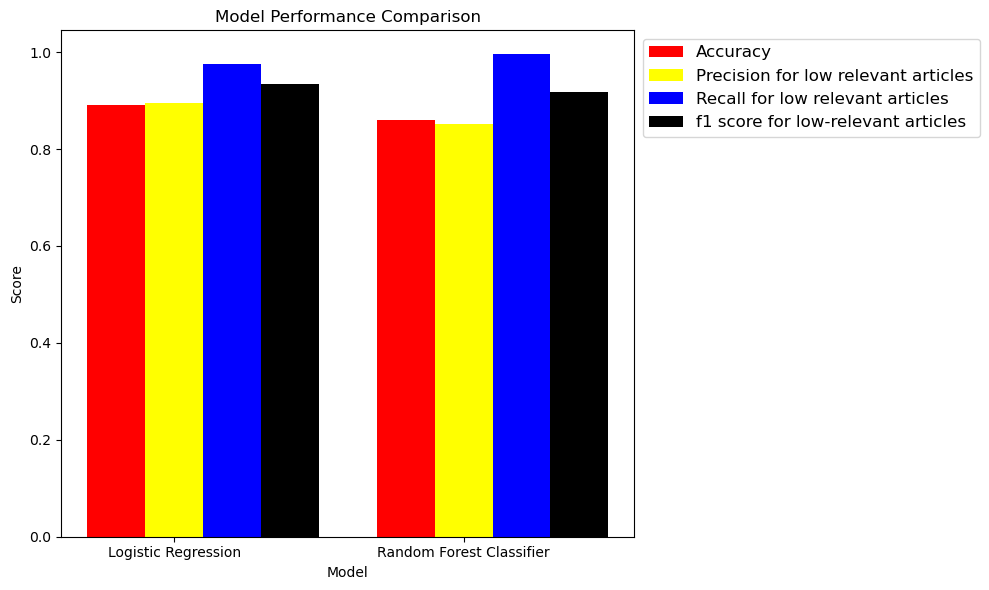

In [125]:
bar_width = 0.2
x = np.arange(2)
plt.figure(figsize=(10, 6))

# Plot the bars
plt.bar(x - bar_width, [acc1, acc2], width=bar_width, color='red', label='Accuracy')
plt.bar(x, [cr1['1']['precision'], cr2['1']['precision']], width=bar_width, color='yellow', label='Precision for low relevant articles')
plt.bar(x + bar_width, [cr1['1']['recall'], cr2['1']['recall']], width=bar_width, color='blue', label='Recall for low relevant articles')
plt.bar(x + 2*bar_width , [cr1['1']['f1-score'], cr2['1']['f1-score']], width=bar_width, color='black', label='f1 score for low-relevant articles')


# Labeling the x-axis
plt.xticks(x, ['Logistic Regression', 'Random Forest Classifier'])

# Adding labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [103]:
cr1['1']

{'precision': 0.8946236559139785,
 'recall': 0.9765258215962441,
 'f1-score': 0.9337822671156004,
 'support': 852.0}

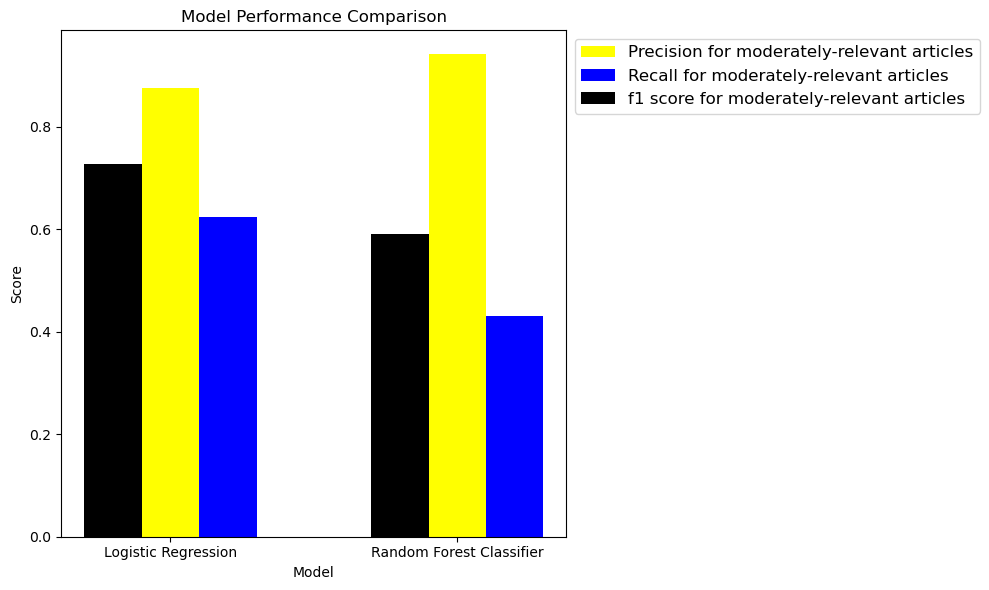

In [127]:
bar_width = 0.2
x = np.arange(2)
plt.figure(figsize=(10, 6))

# Plot the bars
plt.bar(x, [cr1['2']['precision'], cr2['2']['precision']], width=bar_width, color='yellow', label='Precision for moderately-relevant articles')
plt.bar(x + bar_width, [cr1['2']['recall'], cr2['2']['recall']], width=bar_width, color='blue', label='Recall for moderately-relevant articles')
plt.bar(x - bar_width , [cr1['2']['f1-score'], cr2['2']['f1-score']], width=bar_width, color='black', label='f1 score for moderately-relevant articles')


# Labeling the x-axis
plt.xticks(x, ['Logistic Regression', 'Random Forest Classifier'])

# Adding labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()